In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 22.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


<ipython-input-4-8140c5289389>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Accuracy: 0.8088026502602934

Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Accuracy: 0.7884524372929484


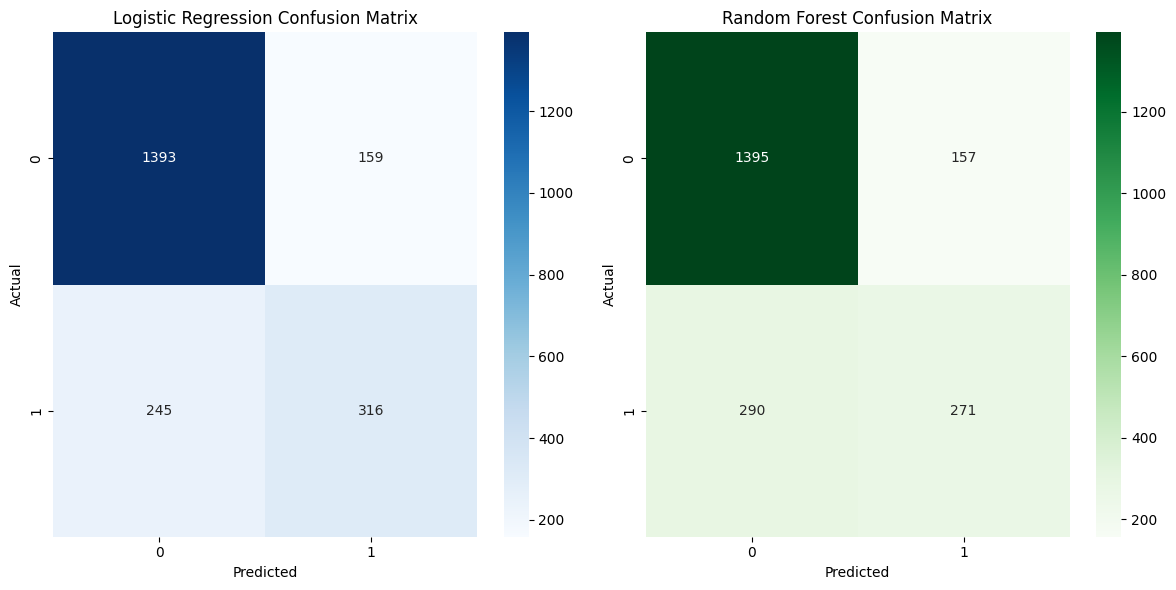

<ipython-input-4-8140c5289389>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


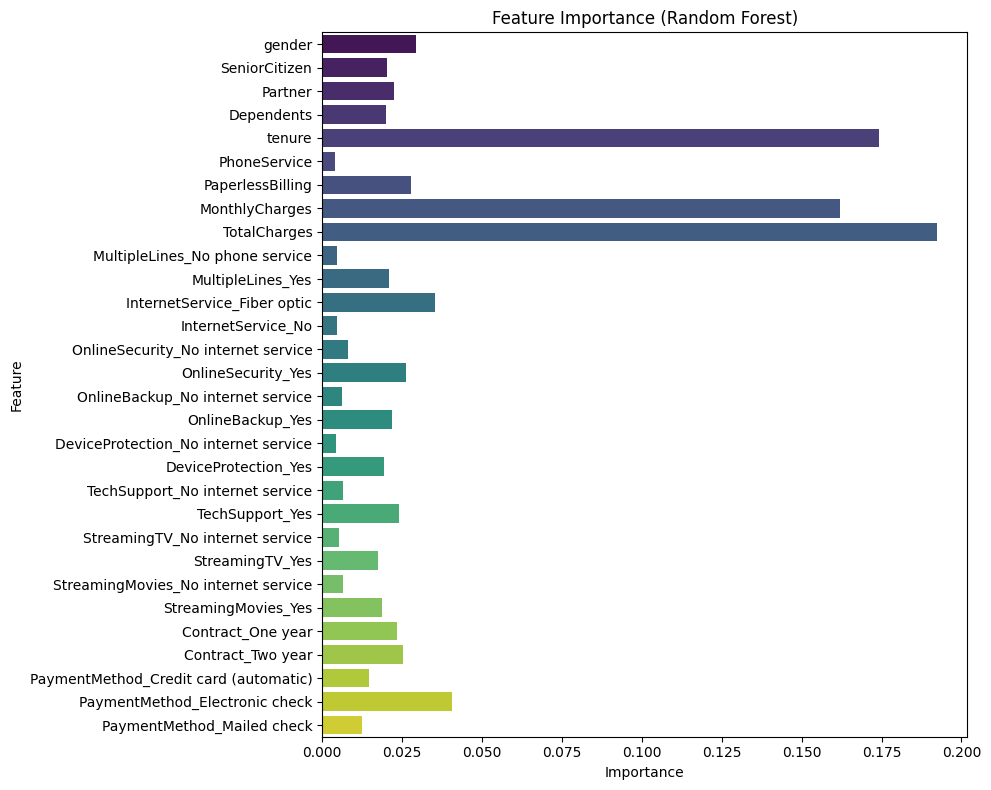

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download dataset using kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
file_path = f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load dataset
df = pd.read_csv(file_path)

# Data Preprocessing
# Drop customer ID as it is not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encoding categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].nunique() == 2:  # Binary encoding for binary categories
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Splitting features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
